<a href="https://colab.research.google.com/github/Praveen10123e/Image-detection-model/blob/main/Praveen_image_detection_model__SRPTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Detected Objects:
1. tiger: 37.87%
2. cougar: 17.40%
3. lion: 14.71%


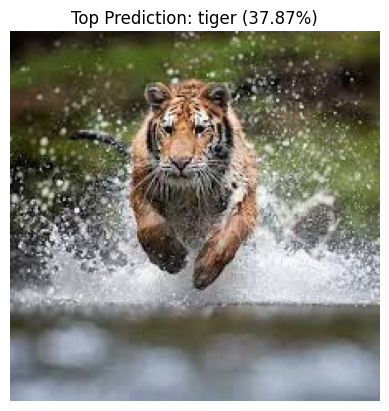

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained MobileNetV2 model
model = MobileNetV2(weights="imagenet")

# Function to preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    image = load_img(image_path, target_size=target_size)
    # Convert the image to a numpy array
    image_array = img_to_array(image)
    # Expand dimensions to match the model input shape
    image_array = np.expand_dims(image_array, axis=0)
    # Preprocess the image for MobileNetV2
    return preprocess_input(image_array)

# Function to perform image detection
def detect_objects(image_path):
    # Preprocess the image
    processed_image = preprocess_image(image_path)
    # Predict the image
    predictions = model.predict(processed_image)
    # Decode predictions
    decoded_predictions = decode_predictions(predictions, top=3)[0]  # Top 3 predictions
    return decoded_predictions

# Path to the image
image_path = "/content/tiger.jfif"  # Replace with the path to your image

# Detect objects in the image
results = detect_objects(image_path)

# Display the results
print("Detected Objects:")
for i, (imagenet_id, label, score) in enumerate(results):
    print(f"{i + 1}. {label}: {score * 100:.2f}%")

# Visualize the image with results
image = load_img(image_path, target_size=(224, 224))
plt.imshow(image)
plt.axis("off")
plt.title(f"Top Prediction: {results[0][1]} ({results[0][2] * 100:.2f}%)")
plt.show()